## <strong> Filename: </strong> <em>CoronaCasesEvo.ipynb<em>
##### <strong>Description:</strong> <em>Creates an Scatter plot of all confirmed cases of COVID-19 in the world using dataset provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases</em>
##### <strong>Author:</strong> <em> Carlos Eduardo Beluzo (cbeluzo@gmail.com)</em>
##### <strong>Creation:</strong> <em> Mar/2020 </em>
##### <strong>Version:</strong> <em> 2020.03-1 </em>

In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import datetime as dt

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df['Province/State'] = df['Province/State'].fillna('n/a')
df = df.fillna(0)
df.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            n/a       Thailand  15.0000  101.0000        2        3        5   
1            n/a          Japan  36.0000  138.0000        2        1        2   
2            n/a      Singapore   1.2833  103.8333        0        1        3   
3            n/a          Nepal  28.1667   84.2500        0        0        0   
4            n/a       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
0        7        8        8  ...      47      48      50      50      50   
1        2        4        4  ...     360     420     461     502     511   
2        3        4        5  ...     117     130     138     150     150   
3        1        1        1  ...       1       1       1       1       1   
4        3        4        4  ...      50      83      93      99     117   

   3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0       53       59       70       75       82  
1      581      639      639      701      773  
2      160      178      178      200      212  
3        1        1        1        1        1  
4      129      149      149      197      238  

[5 rows x 57 columns]

In [550]:
dfA = df.drop(['Province/State','Lat','Long'], axis = 1)
dfA = dfA.groupby('Country/Region').sum().T
dfA = dfA.reset_index()
dfA = dfA.rename(columns = {'index':'Day'})
dfA[['Day']] = pd.to_datetime(dfA['Day'],utc=False)
dfA.head()

Country/Region        Day  Afghanistan  Albania  Algeria  Andorra  \
0              2020-01-22            0        0        0        0   
1              2020-01-23            0        0        0        0   
2              2020-01-24            0        0        0        0   
3              2020-01-25            0        0        0        0   
4              2020-01-26            0        0        0        0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  \
0                                 0          0        0      0          0   
1                                 0          0        0      0          0   
2                                 0          0        0      0          0   
3                                 0          0        0      0          0   
4                                 0          0        0      0          4   

Country/Region  ...  Tunisia  Turkey  US  Ukraine  United Arab Emirates  \
0               ...        0       0   1        0                     0   
1               ...        0       0   1        0                     0   
2               ...        0       0   2        0                     0   
3               ...        0       0   2        0                     0   
4               ...        0       0   5        0                     0   

Country/Region  United Kingdom  Uruguay  Venezuela  Vietnam  \
0                            0        0          0        0   
1                            0        0          0        2   
2                            0        0          0        2   
3                            0        0          0        2   
4                            0        0          0        2   

Country/Region  occupied Palestinian territory  
0                                            0  
1                                            0  
2                                            0  
3                                            0  
4                                            0  

[5 rows x 144 columns]

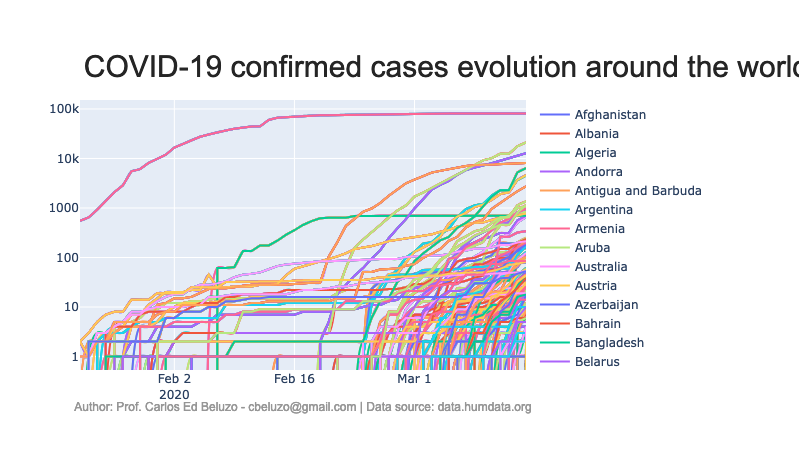

'temp-plot.html'

In [606]:
import plotly.graph_objects as go
import plotly as plt

title = 'Evolution of confirmed cases of COVID-19 in the world'
autor = 'Author: Prof. Carlos Ed Beluzo - cbeluzo@gmail.com'
data_source= 'Data source: data.humdata.org'

for country in dfA.columns[1:]:
#for country in ['Brazil','China']:
    fig.add_trace(go.Scatter(x=dfA.Day, y=dfA[country], mode='lines', name=country, 
                             line=dict(width=2),
                            ))

annotations = []

# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text=autor + ' | ' + data_source,
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)
fig.update_layout(yaxis_type="log")
fig.show()
plt.offline.plot(fig, "COVID-19-World-Cases-Evolution.html")